# **Principal Component Analysis (PCA)**
### Dimensionality Reduction Algorithm

---

## 1. Curse of Dimensionality

<div style="background-color:#1a5f7a; color:white; padding:15px; border-radius:5px; margin:10px 0;">
    <strong>📖 Definition:</strong><br>
    <strong>Curse of Dimensionality:</strong> As the number of features (dimensions) increases beyond a certain point, the model's performance starts degrading due to overfitting and increased computational complexity.
</div>

### Understanding Through Example

Consider a housing price prediction dataset with **500 features**:

| Model | Features Used | Accuracy Trend |
|-------|---------------|----------------|
| M1 | 3 | ↑ Increasing |
| M2 | 6 | ↑ Increasing |
| M3 | 15 | ↑ **Peak** |
| M4 | 50 | ↓ Decreasing |
| M5 | 100 | ↓ Decreasing |
| M6 | 500 | ↓ Worst |

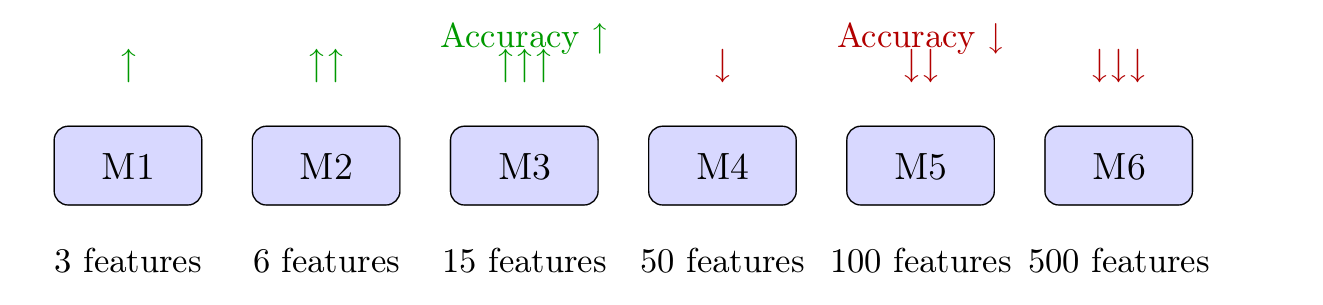

```
Accuracy
    ↑
    │         ∗ (Peak at optimal features)
    │       ∗   ∗
    │     ∗       ∗
    │   ∗           ∗
    │ ∗               ∗
    │∗                  ∗
    └─────────────────────→ Number of Features
         ↑
      Optimal
```

### Why Does This Happen?

1. **Overfitting** → Model learns noise from irrelevant features

2. **Model Confusion** → Too many features → mathematical equations try to learn all, even unimportant ones

3. **Performance Degradation** → More dimensions → more computation → slower training

<div style="background-color:#922B21; color:white; padding:15px; border-radius:5px; margin:10px 0;">
    <strong>⚠️ Important:</strong><br>
    <strong>Real-World Analogy:</strong> A domain expert predicting house prices:<br><br>
    <ul>
        <li>Given: Location, Size, Bedrooms → Can predict accurately</li>
        <li>Add: Near beach, Celebrity neighbor, School count, Grocery shops... → Gets confused!</li>
    </ul>
    Same happens with ML models when overfed with features.
</div>

---

## 2. Why Dimensionality Reduction?

<div style="background-color:#6C3483; color:white; padding:15px; border-radius:5px; margin:10px 0;">
    <strong>🎯 Remember (Interview Question):</strong><br>
    <strong>Three Main Reasons for Dimensionality Reduction:</strong><br><br>
    <ol>
        <li><strong>Prevent Curse of Dimensionality</strong> - Avoid overfitting</li>
        <li><strong>Improve Model Performance</strong> - Less computation, faster training</li>
        <li><strong>Visualize & Understand Data</strong> - Humans can only see up to 3D</li>
    </ol>
</div>

### Two Ways to Remove Curse of Dimensionality

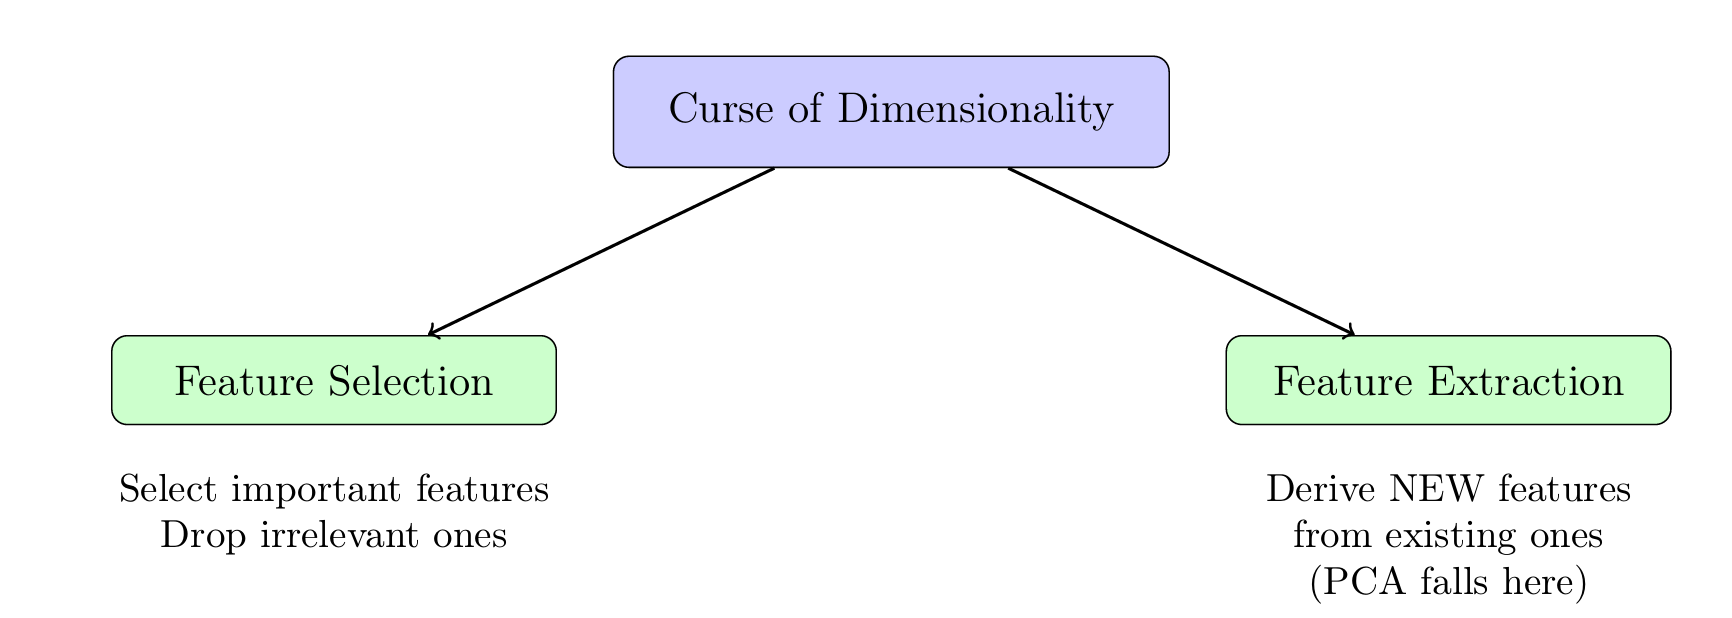

---

## 3. Feature Selection

<div style="background-color:#1a5f7a; color:white; padding:15px; border-radius:5px; margin:10px 0;">
    <strong>📖 Definition:</strong><br>
    <strong>Feature Selection:</strong> Process of selecting the most important features that help predict the output, and dropping irrelevant ones.
</div>

### Covariance

$$\Large \text{Cov}(X, Y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n-1}$$

**Interpretation:**

| Covariance Value | Relationship | Pattern |
|------------------|--------------|--------|
| **Positive (+ve)** | X ↑ ⟹ Y ↑ | Upward slope `/` |
| **Negative (-ve)** | X ↑ ⟹ Y ↓ | Downward slope `\` |
| **≈ 0** | No relationship | Scattered/Circular |

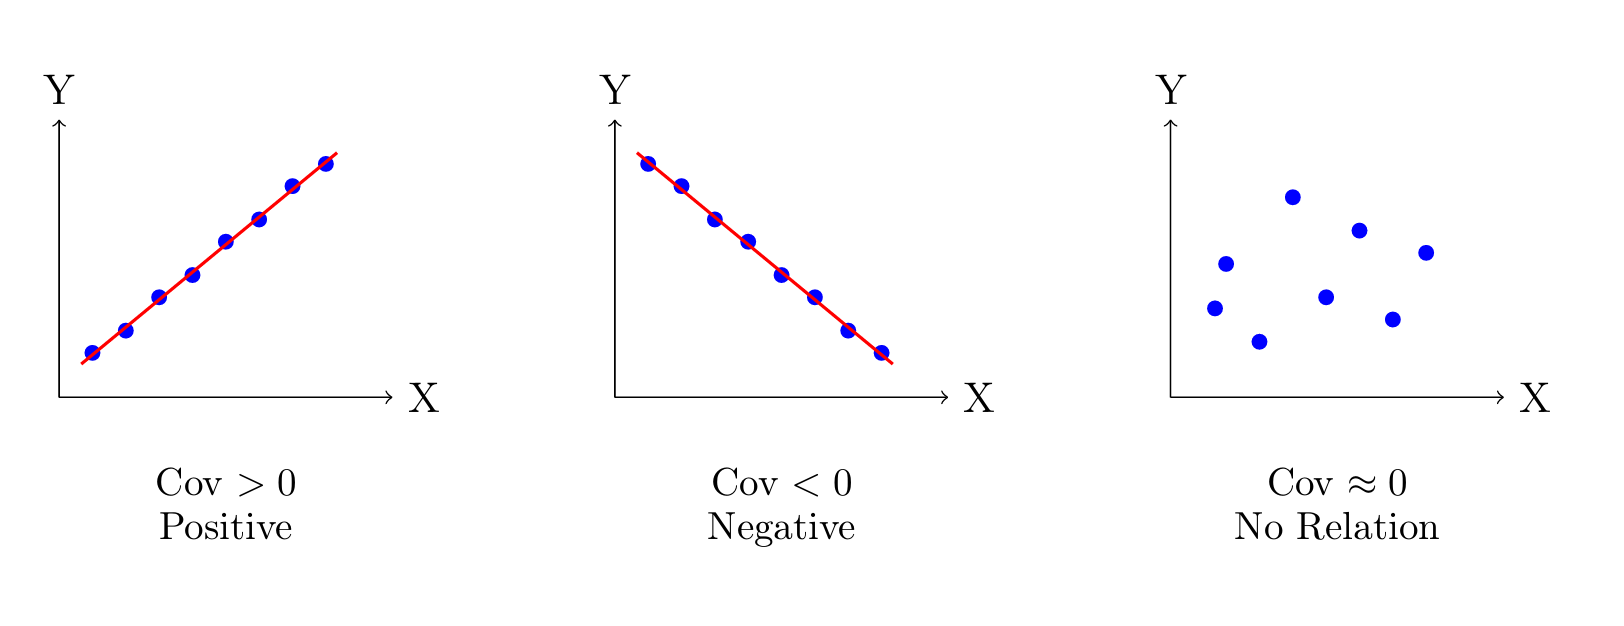

### Pearson Correlation

$$\Large r = \frac{\text{Cov}(X, Y)}{\sigma_X \cdot \sigma_Y}$$

**Range:** $-1 \leq r \leq +1$

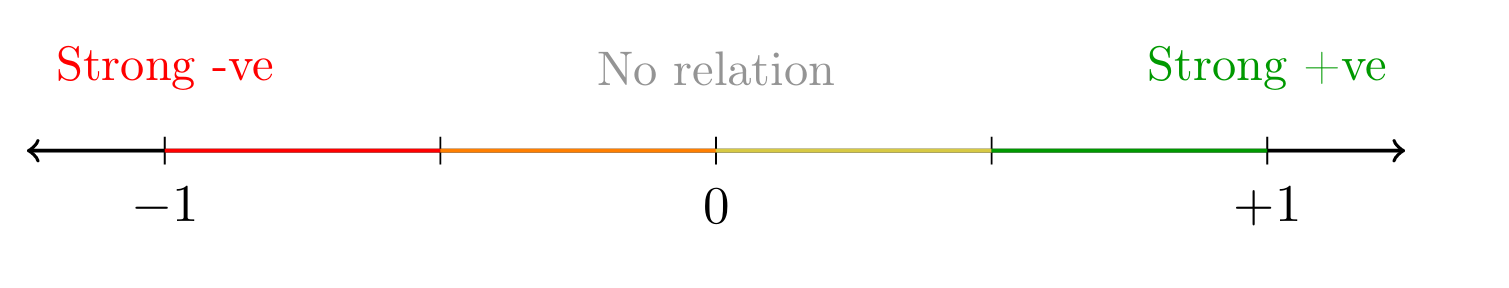

<div style="background-color:#922B21; color:white; padding:15px; border-radius:5px; margin:10px 0;">
    <strong>⚠️ Important - Covariance vs Correlation:</strong><br><br>
    <ul>
        <li><strong>Covariance:</strong> No fixed range (can be any +ve or -ve value)</li>
        <li><strong>Correlation:</strong> Normalized, always between -1 to +1</li>
        <li>Use correlation for standardized comparison between features</li>
    </ul>
</div>

### Feature Selection Example

| Feature vs Price | Correlation | Decision |
|-----------------|-------------|----------|
| House Size | High (+0.85) | ✅ **Keep** |
| Fountain Size | Low (+0.05) | ❌ **Drop** |

---

## 4. Feature Extraction

<div style="background-color:#1a5f7a; color:white; padding:15px; border-radius:5px; margin:10px 0;">
    <strong>📖 Definition:</strong><br>
    <strong>Feature Extraction:</strong> Process of deriving NEW features from existing features by applying transformations, while capturing the essence/variance of original features.
</div>

### Feature Selection vs Feature Extraction

| Feature Selection | Feature Extraction |
|-------------------|-------------------|
| Select subset of original features | Create new derived features |
| Drop unimportant features | Transform & combine features |
| Original feature space maintained | New feature space created |
| Example: Keep House Size, Drop Fountain | Example: Room Size + Num Rooms → House Size |

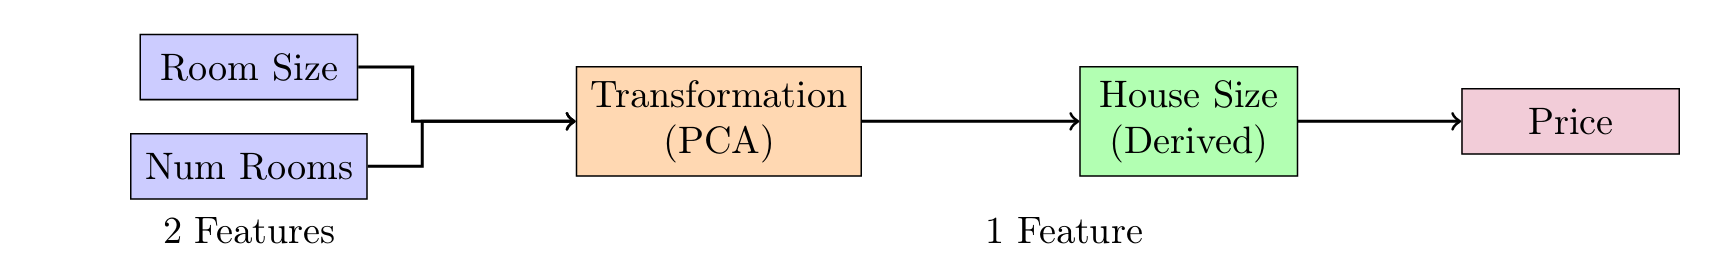

<div style="border-left:4px solid #2a7ed1ff; padding:10px 15px; margin:10px 0; background-color:#f8f9f;">
    <strong>📝 Note:</strong> In feature extraction, some information is lost, but the derived feature captures the <strong>essence</strong> of original features. A domain expert can still make predictions with less but meaningful features.
</div>

---

## 5. Geometric Intuition of PCA

<div style="background-color:#922B21; color:white; padding:15px; border-radius:5px; margin:10px 0;">
    <strong>⚠️ Important - Goal of PCA:</strong><br>
    Find the best principal component line (new axis) such that when all data points are projected onto it, <strong>MAXIMUM VARIANCE</strong> is captured.
</div>

### The Problem with Direct Projection

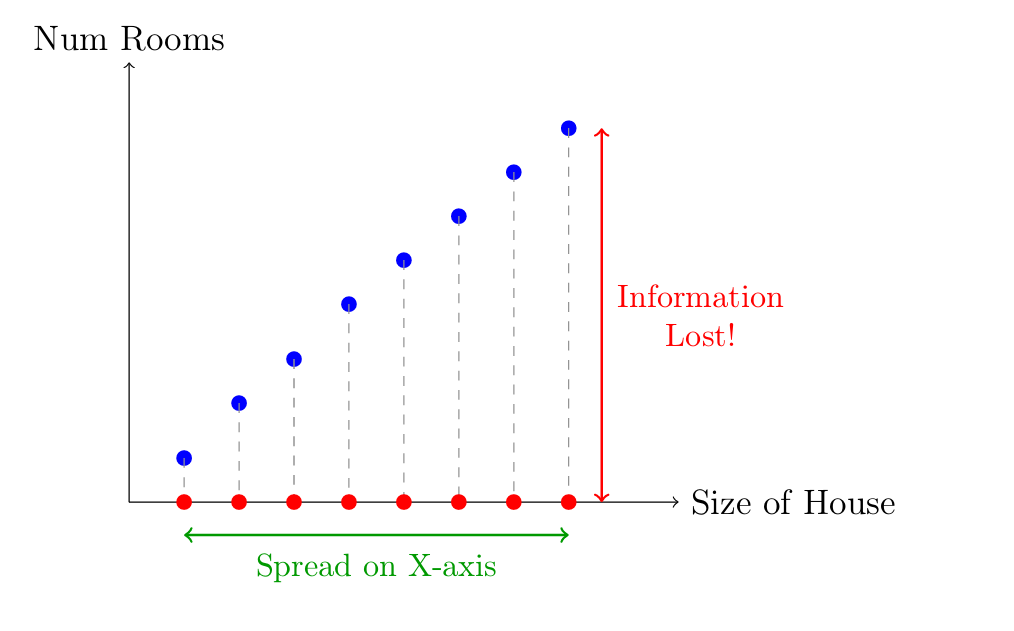

<div style="background-color:#B7950B; color:white; padding:15px; border-radius:5px; margin:10px 0;">
    <strong>⚡ Warning - Problem with Direct Projection:</strong><br><br>
    When projecting directly to X-axis:
    <ul>
        <li>Size information is captured</li>
        <li>But <strong>Number of Rooms</strong> information is LOST!</li>
        <li>The variance in Y-direction is completely ignored</li>
    </ul>
</div>

### PCA Solution: Transform Axes

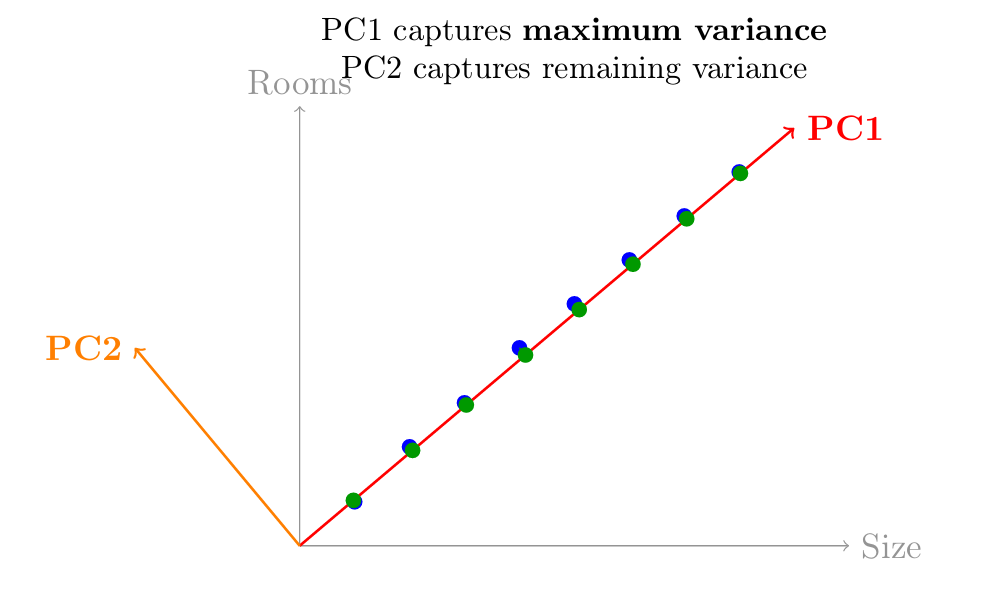
```      
    After transformation:
    • PC1 captures MAXIMUM variance
    • PC2 captures remaining variance
    • PC1 ⊥ PC2 (always perpendicular)
```

<div style="background-color:#6C3483; color:white; padding:15px; border-radius:5px; margin:10px 0;">
    <strong>🎯 Remember - Key Insight:</strong><br><br>
    <ul>
        <li>PCA applies <strong>Eigen Decomposition</strong> to create new axes</li>
        <li>New axes (Principal Components) are oriented to capture maximum variance</li>
        <li>PC1 ⊥ PC2 (always perpendicular)</li>
        <li>Variance(PC1) > Variance(PC2) > Variance(PC3) > ...</li>
    </ul>
</div>

### Principal Components Ordering

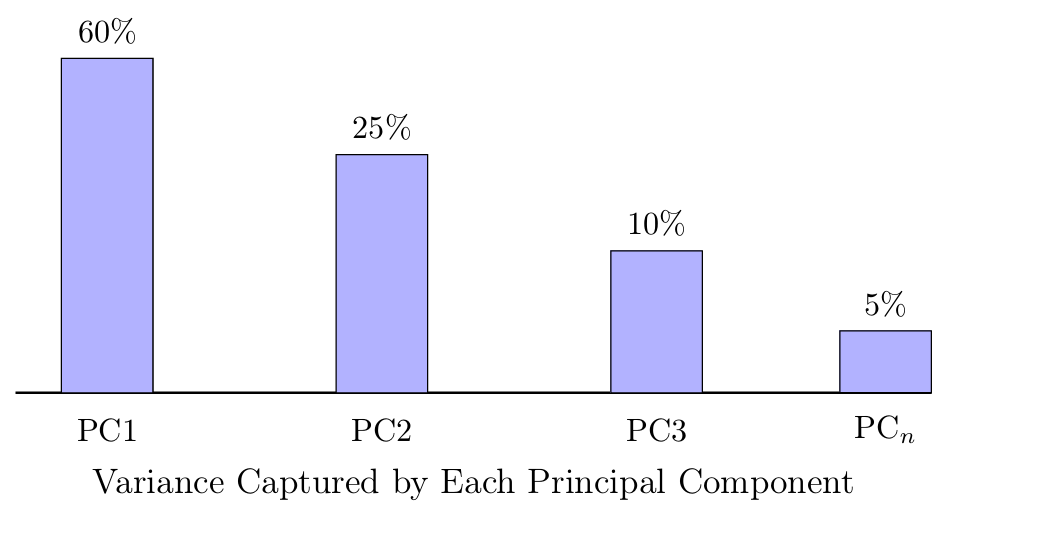

### Dimensionality Reduction Rules

| Conversion | What to Use |
|------------|-------------|
| 2D → 1D | Take PC1 only |
| 3D → 2D | Take PC1 + PC2 |
| 3D → 1D | Take PC1 only |
| nD → kD | Take PC1, PC2, ..., PCₖ |

---

## 6. Mathematical Intuition of PCA

### Projection onto Unit Vector

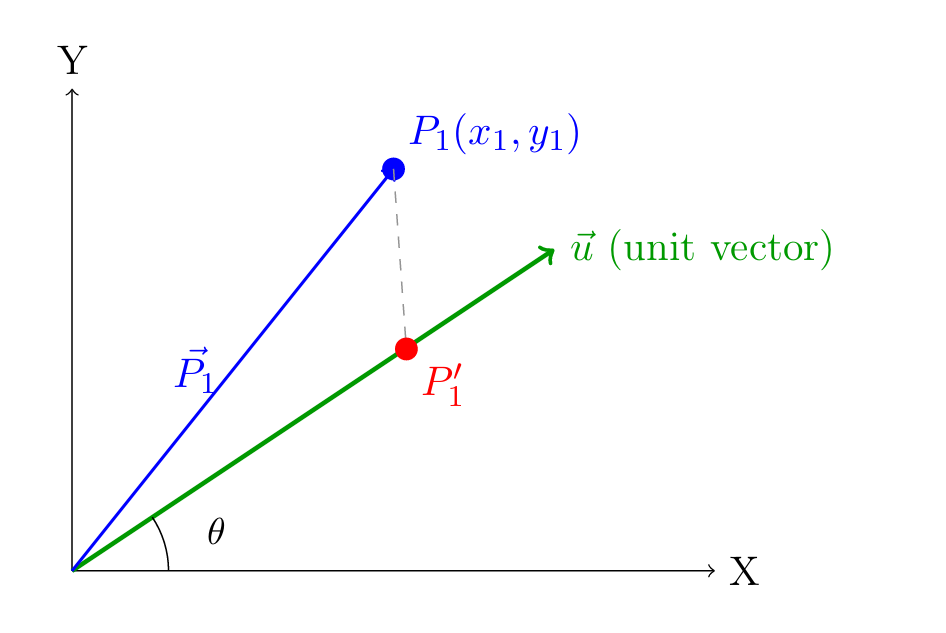

**Projection Formula:**

$$\Large \text{Projection of } \vec{P_1} \text{ on } \vec{u} = \frac{\vec{P_1} \cdot \vec{u}}{|\vec{u}|}$$

Since $|\vec{u}| = 1$ (unit vector):

$$\Large \boxed{P_1' = \vec{P_1} \cdot \vec{u}}$$

<div style="border-left:4px solid #2b6fb4ff; padding:10px 15px; margin:10px 0; background-color:#f8f9f;">
    <strong>📝 Note:</strong> The projection gives a <strong>scalar value</strong> representing the distance from origin along the unit vector direction.
</div>

### Variance as Cost Function

After projecting all points $P_1, P_2, \ldots, P_n$ onto unit vector $\vec{u}$:

$$P_1' = \vec{P_1} \cdot \vec{u} = x_1'$$
$$P_2' = \vec{P_2} \cdot \vec{u} = x_2'$$
$$\vdots$$
$$P_n' = \vec{P_n} \cdot \vec{u} = x_n'$$

**Variance of Projected Points:**

$$\Large \text{Variance} = \frac{\sum_{i=1}^{n}(x_i' - \bar{x'})^2}{n}$$

<div style="background-color:#922B21; color:white; padding:15px; border-radius:5px; margin:10px 0;">
    <strong>⚠️ Important - Goal:</strong><br><br>
    Find the <strong>best unit vector $\vec{u}$</strong> such that variance of projected points is <strong>MAXIMUM</strong>.
    $$\max_{\vec{u}} \text{Variance}(x_1', x_2', \ldots, x_n')$$
</div>

---

## 7. Eigenvectors and Eigenvalues

<div style="background-color:#1a5f7a; color:white; padding:15px; border-radius:5px; margin:10px 0;">
    <strong>📖 Definition:</strong><br><br>
    For a matrix $A$, if there exists a vector $\vec{v}$ and scalar $\lambda$ such that:
    $$\Large A\vec{v} = \lambda\vec{v}$$
    Then:
    <ul>
        <li>$\vec{v}$ is the <strong>Eigenvector</strong></li>
        <li>$\lambda$ is the <strong>Eigenvalue</strong> (magnitude of eigenvector)</li>
    </ul>
</div>

### Linear Transformation Visualization

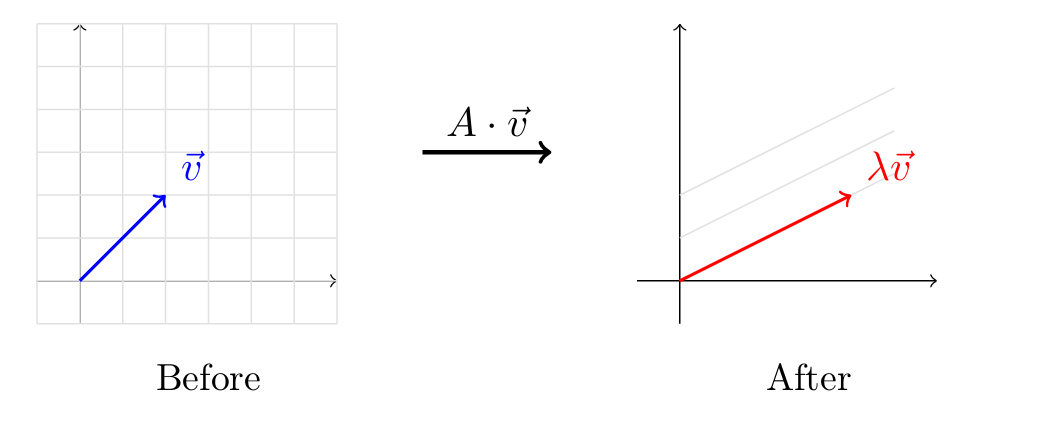

<div style="background-color:#6C3483; color:white; padding:15px; border-radius:5px; margin:10px 0;">
    <strong>🎯 Remember - Key Property of Eigenvectors:</strong><br><br>
    <ul>
        <li>After linear transformation, eigenvector only gets <strong>scaled</strong> (by λ)</li>
        <li>Direction remains the <strong>same</strong> (or exactly opposite if λ < 0)</li>
        <li>The eigenvector with <strong>largest eigenvalue</strong> captures <strong>maximum variance</strong></li>
    </ul>
</div>

### Why Eigenvectors for PCA?

```
┌─────────────────────────────────────────────────────────┐
│  Need to find unit vector that captures max variance    │
└──────────────────────────┬──────────────────────────────┘
                           ▼
┌─────────────────────────────────────────────────────────┐
│  Can't do hit-and-trial for infinite directions         │
└──────────────────────────┬──────────────────────────────┘
                           ▼
┌─────────────────────────────────────────────────────────┐
│  Use Eigen Decomposition on Covariance Matrix           │
└──────────────────────────┬──────────────────────────────┘
                           ▼
┌─────────────────────────────────────────────────────────┐
│  Eigenvector with largest eigenvalue = PC1              │
└──────────────────────────┬──────────────────────────────┘
                           ▼
┌─────────────────────────────────────────────────────────┐
│  ✓ Mathematically proven: This captures max variance    │
└─────────────────────────────────────────────────────────┘
```

---

## 8. Complete PCA Algorithm Steps

```
┌────────────────────────────────────────────────────────────┐
│  Step 1: Standardize the data (zero-centered)              │
└──────────────────────────┬─────────────────────────────────┘
                           ▼
┌────────────────────────────────────────────────────────────┐
│  Step 2: Compute Covariance Matrix                         │
└──────────────────────────┬─────────────────────────────────┘
                           ▼
┌────────────────────────────────────────────────────────────┐
│  Step 3: Find Eigenvectors and Eigenvalues                 │
└──────────────────────────┬─────────────────────────────────┘
                           ▼
┌────────────────────────────────────────────────────────────┐
│  Step 4: Sort eigenvectors by eigenvalues (descending)     │
└──────────────────────────┬─────────────────────────────────┘
                           ▼
┌────────────────────────────────────────────────────────────┐
│  Step 5: Select top k eigenvectors (Principal Components)  │
└──────────────────────────┬─────────────────────────────────┘
                           ▼
┌────────────────────────────────────────────────────────────┐
│  Step 6: Project data onto selected PCs                    │
└────────────────────────────────────────────────────────────┘
```

### Step 1: Standardization

$$\Large x_{\text{standardized}} = \frac{x - \mu}{\sigma}$$

This makes data **zero-centered** (mean = 0, std = 1)

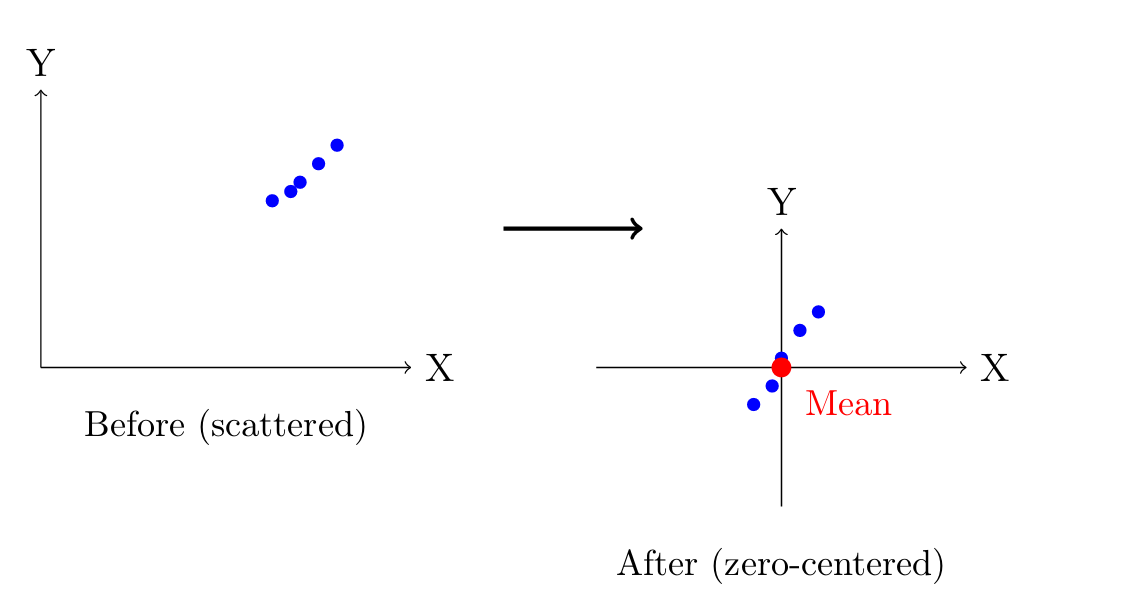

### Step 2: Covariance Matrix

**For 2 Features (X and Y):**

$$\Sigma = \begin{bmatrix} \text{Var}(X) & \text{Cov}(X,Y) \\ \text{Cov}(Y,X) & \text{Var}(Y) \end{bmatrix}$$

**For 3 Features (X, Y, Z):**

$$\Sigma = \begin{bmatrix} \text{Var}(X) & \text{Cov}(X,Y) & \text{Cov}(X,Z) \\ \text{Cov}(Y,X) & \text{Var}(Y) & \text{Cov}(Y,Z) \\ \text{Cov}(Z,X) & \text{Cov}(Z,Y) & \text{Var}(Z) \end{bmatrix}$$

<div style="border-left:4px solid #3170aeff; padding:10px 15px; margin:10px 0; background-color:#f8f9f;">
    <strong>📝 Note - Matrix Size:</strong><br><br>
    <ul>
        <li>2 features → 2×2 covariance matrix → 2 eigenvalues</li>
        <li>3 features → 3×3 covariance matrix → 3 eigenvalues</li>
        <li>n features → n×n covariance matrix → n eigenvalues</li>
    </ul>
    Also: Cov(X,Y) = Cov(Y,X) → Symmetric Matrix
</div>

### Step 3: Eigen Decomposition

Apply to covariance matrix $\Sigma$:

$$\Large \Sigma \vec{v} = \lambda \vec{v}$$

**Result:**
- $\lambda_1, \lambda_2, \ldots, \lambda_n$ (Eigenvalues)
- $\vec{v_1}, \vec{v_2}, \ldots, \vec{v_n}$ (Eigenvectors)

### Step 4 & 5: Sort and Select

| Eigenvector | Eigenvalue | Rank | Principal Component |
|-------------|------------|------|--------------------|
| $\vec{v_1}$ | λ₁ = 50 | 1 | **PC1** (Max Variance) |
| $\vec{v_2}$ | λ₂ = 20 | 2 | PC2 |
| $\vec{v_3}$ | λ₃ = 5 | 3 | PC3 |

<div style="background-color:#6C3483; color:white; padding:15px; border-radius:5px; margin:10px 0;">
    <strong>🎯 Remember:</strong><br><br>
    <strong>Eigenvalue = Magnitude = Variance Captured</strong>
    <ul>
        <li>Largest eigenvalue → PC1 (captures most variance)</li>
        <li>Second largest → PC2</li>
        <li>And so on...</li>
    </ul>
</div>

### Step 6: Project Data

$$\Large \boxed{\text{New Data} = \text{Original Data} \times \text{Selected Eigenvectors}}$$

---

## 9. Dimensionality Reduction Examples

| Conversion | Eigenvalues Obtained | Use |
|------------|---------------------|-----|
| 2D → 1D | λ₁, λ₂ | PC1 only |
| 3D → 2D | λ₁, λ₂, λ₃ | PC1 + PC2 |
| 3D → 1D | λ₁, λ₂, λ₃ | PC1 only |
| 100D → 3D | λ₁, ..., λ₁₀₀ | PC1 + PC2 + PC3 |

---

## 10. Key Formulas Summary

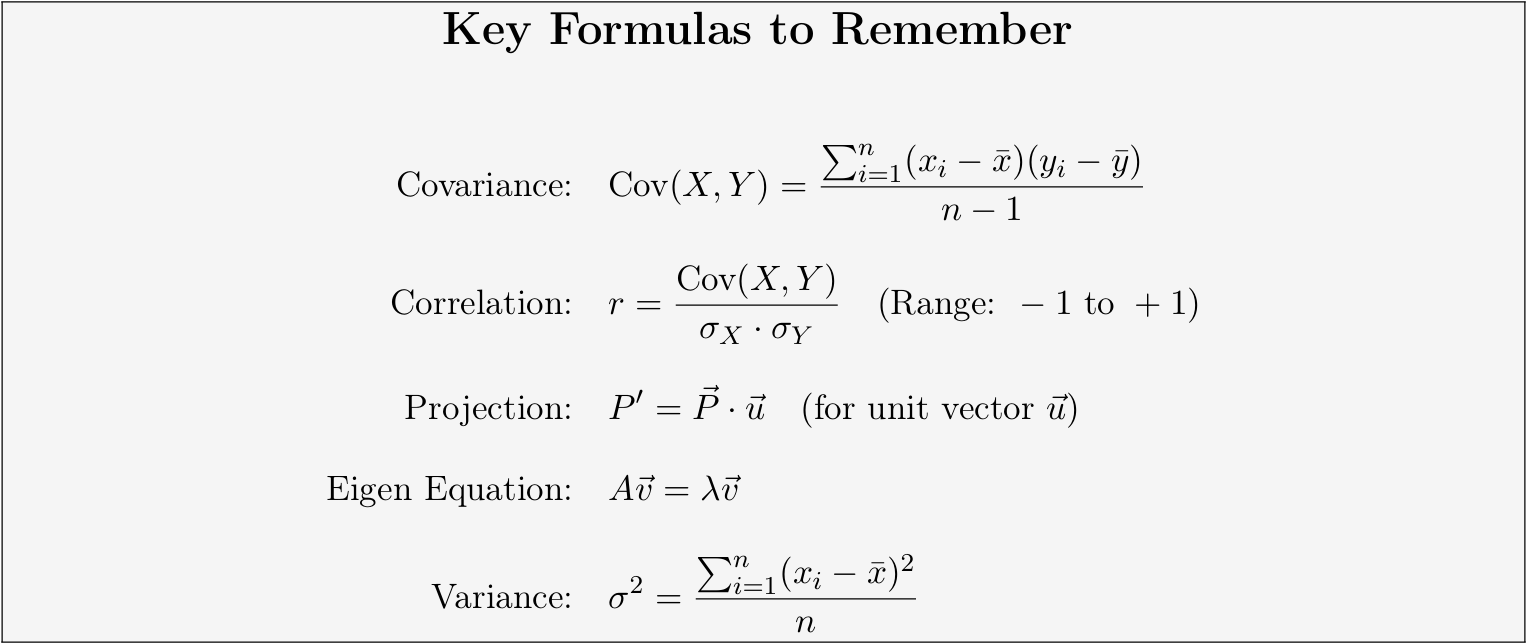

---

## 11. Quick Revision Points

<div style="background-color:#196F3D; color:white; padding:15px; border-radius:5px; margin:10px 0;">
    <strong>✅ Quick Revision Checklist:</strong><br><br>
    <ol>
        <li><strong>Curse of Dimensionality:</strong> More features beyond optimal → accuracy decreases</li><br>
        <li><strong>Two Solutions:</strong> Feature Selection (drop features) vs Feature Extraction (derive new features)</li><br>
        <li><strong>PCA Goal:</strong> Find principal components that capture maximum variance</li><br>
        <li><strong>Covariance Matrix:</strong> Computed from features, size = n×n for n features</li><br>
        <li><strong>Eigen Decomposition:</strong> Applied on covariance matrix to get eigenvectors & eigenvalues</li><br>
        <li><strong>Eigenvalue:</strong> Represents magnitude/variance captured by that eigenvector</li><br>
        <li><strong>PC Ordering:</strong> Var(PC1) > Var(PC2) > Var(PC3) > ...</li><br>
        <li><strong>Standardization:</strong> Always do before PCA (zero-center the data)</li><br>
        <li><strong>Why PCA:</strong>
            <ul>
                <li>Prevent curse of dimensionality</li>
                <li>Improve model performance</li>
                <li>Visualize high-dimensional data</li>
            </ul>
        </li>
    </ol>
</div>

---

## 12. Common Interview Questions

<div style="background-color:#922B21; color:white; padding:15px; border-radius:5px; margin:10px 0;">
    <strong>🎤 Interview Questions:</strong><br><br>
    <strong>Q1: Why use dimensionality reduction?</strong>
    <ul>
        <li>Prevent curse of dimensionality</li>
        <li>Improve model performance</li>
        <li>Visualize & understand data (reduce to 2D/3D)</li>
    </ul>
    <br>
    <strong>Q2: Difference between Feature Selection & Feature Extraction?</strong>
    <ul>
        <li>Selection: Choose subset of original features</li>
        <li>Extraction: Create new derived features (PCA)</li>
    </ul>
    <br>
    <strong>Q3: What does eigenvalue represent in PCA?</strong>
    <ul>
        <li>Magnitude of eigenvector</li>
        <li>Amount of variance captured by that principal component</li>
    </ul>
    <br>
    <strong>Q4: Why standardize before PCA?</strong>
    <ul>
        <li>Features may have different scales</li>
        <li>PCA is sensitive to variance</li>
        <li>Larger scale features would dominate otherwise</li>
    </ul>
</div>

---

## 13. PCA Algorithm Summary Diagram

```
                         PCA ALGORITHM FLOW
                         ==================

    ┌──────────────┐
    │ Raw Data     │    n samples × m features
    │ (X)          │
    └──────┬───────┘
           │
           ▼
    ┌──────────────┐
    │ Standardize  │    x' = (x - μ) / σ
    │              │    → Zero-centered data
    └──────┬───────┘
           │
           ▼
    ┌──────────────┐
    │ Compute      │    
    │ Covariance   │    Σ = (1/n) X'ᵀX'
    │ Matrix       │    → m × m matrix
    └──────┬───────┘
           │
           ▼
    ┌──────────────┐
    │ Eigen        │    Σv = λv
    │ Decomposition│    → m eigenvectors
    │              │    → m eigenvalues
    └──────┬───────┘
           │
           ▼
    ┌──────────────┐
    │ Sort & Select│    λ₁ > λ₂ > λ₃ > ...
    │ Top k PCs    │    Select top k eigenvectors
    └──────┬───────┘
           │
           ▼
    ┌──────────────┐
    │ Project Data │    X_new = X' × V_k
    │              │    → n samples × k features
    └──────────────┘

    RESULT: Reduced from m dimensions to k dimensions
            while preserving maximum variance!
```

---

*End of PCA Notes*